In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import fftpack
from skimage import io
from scipy.ndimage import gaussian_filter

In [2]:
def computeMagnitudeSpectrum(image):
    # 2-D discrete Fourier transform.
    F1 = fftpack.fft2(image)
    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    
    # Shift the zero-frequency component to the center of the spectrum.
    F2 = fftpack.fftshift( F1 )
 
    # Calculate a 2D power spectrum
    #psd2D = np.abs( F2 )**2
    ms = 20*np.abs(F2)
    
    return ms


def computePhaseSpectrum(image):
    F1 = fftpack.fft2(image)
    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )
 
    # Calculate a 2D power spectrum
    #psd2D = np.abs( F2 )**2
    ps = np.angle(F2)
    
    return ps

In [3]:
image1 = io.imread("../pics/Fig1036(c)(gaussian_noise_mean_0_std_50_added).tif")
image2 = gaussian_filter(image1, sigma = 1)
image3 = gaussian_filter(image1, sigma = 2)

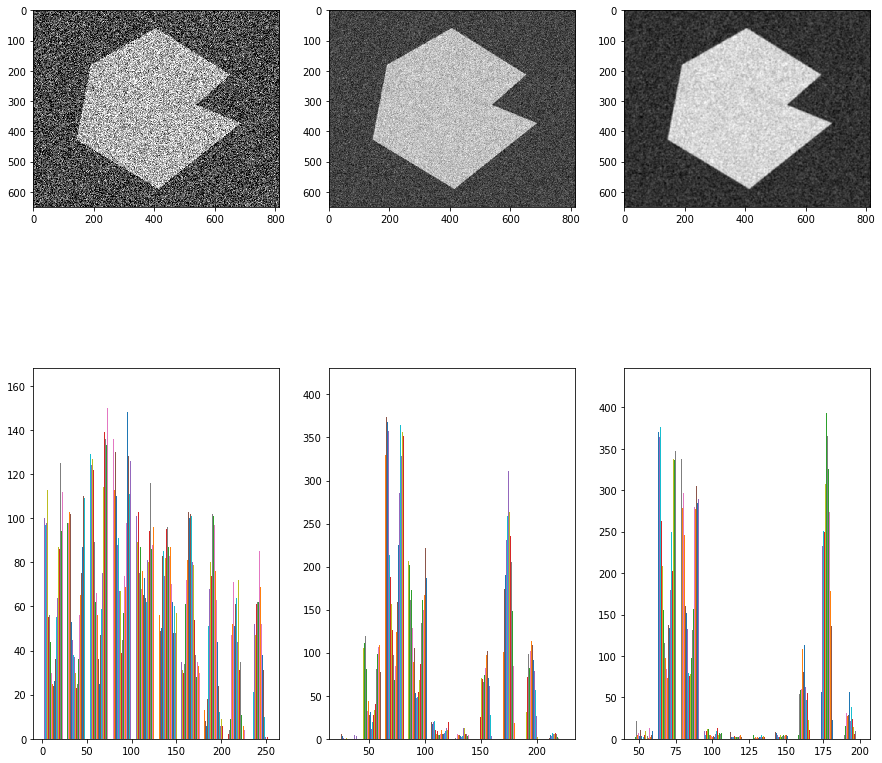

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.subplot(2, 3, 1)
plt.imshow(image1, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(image2, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(image3, cmap='gray')
plt.subplot(2, 3, 4)
plt.hist(image1)
plt.subplot(2, 3, 5)
plt.hist(image2)
plt.subplot(2, 3, 6)
plt.hist(image3)
plt.show()

In [5]:
ms1 = computeMagnitudeSpectrum(image1)
ps1 = computePhaseSpectrum(image1)
ms2 = computeMagnitudeSpectrum(image2)
ps2 = computePhaseSpectrum(image2)
ms3 = computeMagnitudeSpectrum(image3)
ps3 = computePhaseSpectrum(image3)

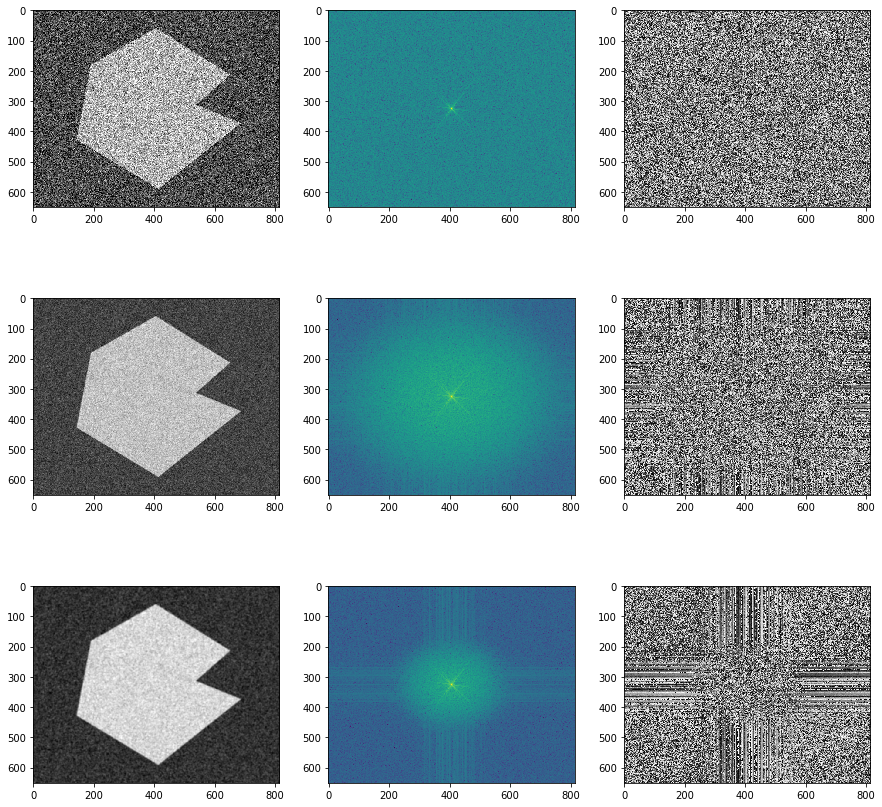

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.imshow(image1, cmap='gray')
plt.subplot(3, 3, 2)
plt.imshow(np.log10( ms1 ))
plt.subplot(3, 3, 3)
plt.imshow(ps1, cmap='gray')
plt.subplot(3, 3, 4)
plt.imshow(image2, cmap='gray')
plt.subplot(3, 3, 5)
plt.imshow(np.log10( ms2 ))
plt.subplot(3, 3, 6)
plt.imshow(ps2, cmap='gray')
plt.subplot(3, 3, 7)
plt.imshow(image3, cmap='gray')
plt.subplot(3, 3, 8)
plt.imshow(np.log10( ms3 ))
plt.subplot(3, 3, 9)
plt.imshow(ps3, cmap='gray')
plt.show()

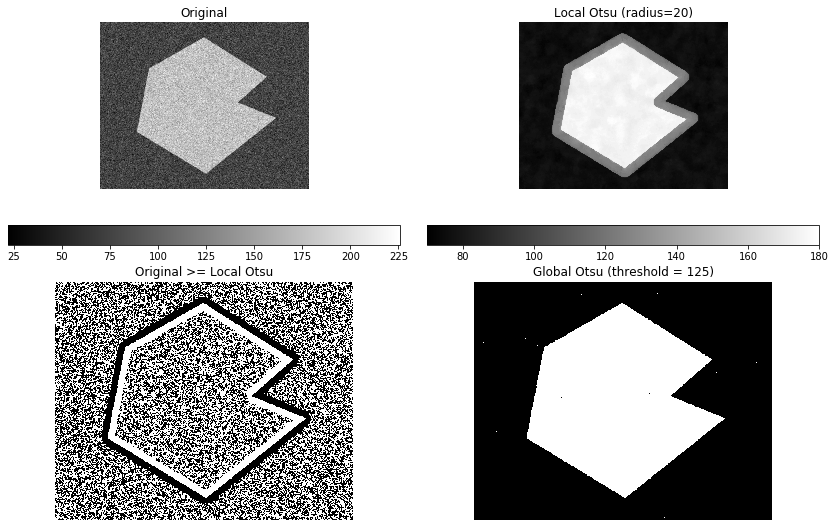

In [7]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte

radius = 20
selem = disk(radius)

local_otsu = rank.otsu(image2, selem)
threshold_global_otsu = threshold_otsu(image2)
global_otsu = image2 >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(12, 7.5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(image2, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(image2 >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()

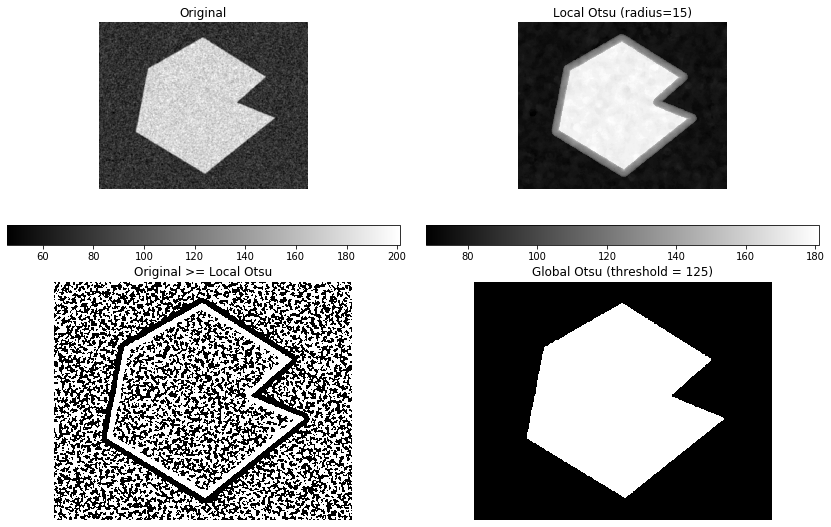

In [8]:
radius = 15
selem = disk(radius)

local_otsu = rank.otsu(image3, selem)
threshold_global_otsu = threshold_otsu(image3)
global_otsu = image3 >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(12, 7.5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(image3, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(image3 >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()